In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf

import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

%matplotlib inline

In [2]:
data_dir = "blood_cell_data"

In [3]:
train_data_dir = os.path.join(data_dir, "TRAIN")
validation_data_dir = os.path.join(data_dir, "TEST")
print(train_data_dir)

blood_cell_data\TRAIN


In [4]:
# Count images
import glob

for i in os.listdir(train_data_dir):
    print(i, len(glob.glob(train_data_dir + "/" + i + "/*")))

EOSINOPHIL 2497
LYMPHOCYTE 2483
MONOCYTE 2478
NEUTROPHIL 2499


In [5]:
import pathlib

train_data_dir = pathlib.Path(train_data_dir)

EOSINOPHIL = list(train_data_dir.glob('EOSINOPHIL/*'))
img = PIL.Image.open(str(EOSINOPHIL[1]))
# get shape of the image
img.size


(320, 240)

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode="categorical"
)
test_set = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode="categorical"
)

Found 9957 images belonging to 4 classes.
Found 71 images belonging to 4 classes.


In [10]:
class_names = list(training_set.class_indices.keys())
print(class_names)

batch_size = 32
img_height = 180
img_width = 180

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']


In [11]:
# Build the model
## Create the model

num_classes = len(class_names)

model = Sequential([  
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(24, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 24)        3480      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 24)        0

In [8]:
# Train the model
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

NameError: name 'model' is not defined

In [7]:
# Plot the training and validation accuracy/loss at each epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined

In [9]:
augmented_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
#     zoom_range=0.1,
    channel_shift_range=50,
    rescale=1. / 255,
    shear_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='constant'
)

In [11]:
train_data_dir

WindowsPath('blood_cell_data/TRAIN')

In [16]:

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

for f in os.listdir(train_data_dir):
    pics = os.listdir(os.path.join(train_data_dir, f))
    for img in pics:
        # print(len(os.listdir(os.path.join(train_data_dir, f))))
        # if len(os.listdir(os.path.join(train_data_dir, f))) >= 2500:
                # break
        loaded_img = load_img(os.path.join(train_data_dir, f, img))
        x_test = img_to_array(loaded_img)
        x_test = x_test.reshape((1,) + x_test.shape)
        augmented_datagen.fit(x_test)
        batches = 0
        for batch in augmented_datagen.flow(x_test, save_to_dir=f'blood_cell_data/augTrain/{f}', save_prefix=f'{f}'):
            batches += 1
            if batches > 400 or len(os.listdir(f'blood_cell_data/augTrain/{f}')) >= 2500 :
                break

In [17]:
# space for test augment image generation

In [77]:
# # glob.glob(os.path.join("blood_cell_data\TRAIN", '*', '*'))   

# # get all images in the folder
# images = glob.glob(os.path.join("blood_cell_data\TRAIN", '*', '*'))

# # abcd = {os.path.basename(x): x for x in images}
# abcd = []
# for x in images:
#     # print(x)
#     abcd.append(os.path.basename(x))

# # apply loop compreheension
# abcd = {os.path.basename(x) for x in images}

# print(len(images))
# print(len(abcd))

# # list(train_data_dir.glob('*/*'))

9893


In [61]:
all_augmented_train_image_paths = {
    os.path.basename(x): x for x in glob.glob(
        os.path.join("blood_cell_data\TRAIN", '*', '*')
        )   
}
all_augmented_test_image_paths = {
    os.path.basename(x): x for x in glob.glob(
        os.path.join("blood_cell_data\TEST", '*', '*')
        )   
}
# all_image_paths = [x for x in p.glob('**/*.jpg')]
print('Augmented train scans found:', len(all_augmented_train_image_paths))
print('Augmented test scans found:', len(all_augmented_test_image_paths))

Augmented train scans found: 9893
Augmented test scans found: 71


In [78]:


train_augmented_df = pd.DataFrame()
test_augmented_df = pd.DataFrame()

train_augmented_df['image'] = all_augmented_train_image_paths.keys()
test_augmented_df['image'] = all_augmented_test_image_paths.keys()

train_augmented_df['image_path'] = train_augmented_df['image'].map(all_augmented_train_image_paths.get)
test_augmented_df['image_path'] = test_augmented_df['image'].map(all_augmented_test_image_paths.get)

train_augmented_df['category'] = train_augmented_df['image_path'].apply(lambda x: x.split('\\')[-2])
test_augmented_df['category'] = test_augmented_df['image_path'].apply(lambda x: x.split('\\')[-2])


# print(train_augmented_df['image'].map(all_augmented_train_image_paths.get))
# print(train_augmented_df['image_path'].apply(lambda x: x.split('\\')[-2]))

print(train_augmented_df.category.value_counts(), '\n')
print(test_augmented_df.category.value_counts())

NEUTROPHIL    2499
EOSINOPHIL    2477
MONOCYTE      2473
LYMPHOCYTE    2444
Name: category, dtype: int64 

NEUTROPHIL    48
EOSINOPHIL    13
LYMPHOCYTE     6
MONOCYTE       4
Name: category, dtype: int64


In [79]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    validation_split=0.2,
)
test_datagen = ImageDataGenerator(
    rescale=1. / 255
)

train_generator=train_datagen.flow_from_directory(
    f'blood_cell_data/TRAIN',
    target_size=(72,96), 
    batch_size=32,
)
test_generator=test_datagen.flow_from_directory(
    f'blood_cell_data/TEST', 
    class_mode="categorical", 
    target_size=(72,96), 
    batch_size=32
)

Found 9957 images belonging to 4 classes.
Found 71 images belonging to 4 classes.


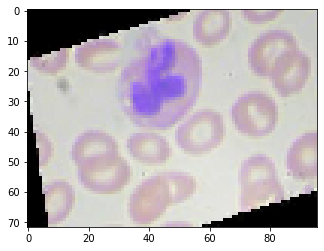

In [80]:
#augmented_datagen

x,y = train_generator.next()
for i in range(0,1):
    image = x[i]
    plt.imshow(image)
    plt.show()

c:\Users\ABHIJITH UDAYAKUMAR\.conda\envs\tensorflow\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


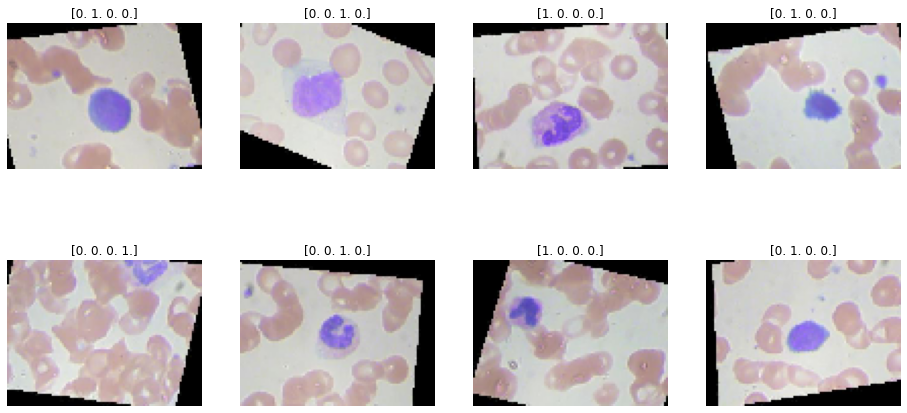

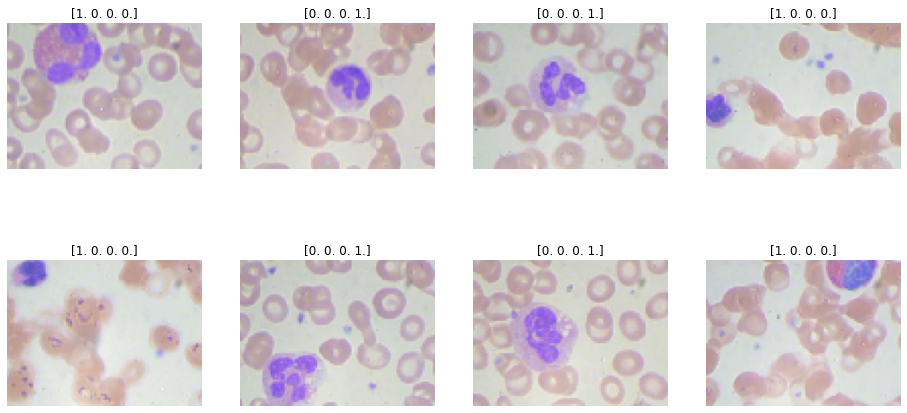

In [81]:
for i in [train_generator, test_generator]:
    x, y = next(i)
    fig, m_axs = plt.subplots(2, 4, figsize = (16, 8))
    for (c_x, c_y, c_ax) in zip(x, y, m_axs.flatten()):
        c_ax.imshow(c_x[:,:])
        c_ax.set_title(c_y)
        c_ax.axis('off')

In [101]:
from sklearn.metrics import classification_report, confusion_matrix

# import all the necessary CNN layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Rescaling, Activation


# CNN for blood cell classification
tb_model = Sequential()
tb_model.add(Rescaling(1./255, input_shape=(180, 180, 3)))
tb_model.add(Conv2D(8, 3, padding='same', activation='relu'))
tb_model.add(MaxPooling2D())

tb_model.add(Conv2D(16, 3, padding='same', activation='relu'))
tb_model.add(MaxPooling2D())

tb_model.add(Conv2D(24, 3, padding='same', activation='relu'))
tb_model.add(MaxPooling2D())

tb_model.add(Flatten())
tb_model.add(Dense(128, activation='relu')),
tb_model.add(Dropout(0.5))
tb_model.add(Dense(4))

tb_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

tb_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_7 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 180, 180, 8)       224       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 90, 90, 8)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 90, 90, 16)        1168      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 45, 45, 24)        3480      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 22, 22, 24)       

In [102]:
# # model training
# history = tb_model.fit_generator(
#     train_generator,
#     steps_per_epoch=100,
#     epochs=10,
#     validation_data=test_generator,
#     validation_steps=50,
#     verbose=1
# )

epochs=10
history = tb_model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=epochs,
    verbose=1
)

Epoch 1/10


InvalidArgumentError:  Input to reshape is a tensor with 82944 values, but the requested shape requires a multiple of 11616
	 [[node sequential_9/flatten_8/Reshape (defined at <ipython-input-102-1e252ca8f1e5>:16) ]] [Op:__inference_train_function_16433]

Function call stack:
train_function


In [106]:

def runCNN(e):

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(60, 80, 3),strides=e))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                    optimizer=keras.optimizers.Adadelta(),
                    metrics=['accuracy'])

    return model

In [108]:
# runCNN(1)
history = runCNN(1).fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    verbose=1
)

Epoch 1/10


InvalidArgumentError:  Input to reshape is a tensor with 3203072 values, but the requested shape requires a multiple of 68096
	 [[node sequential_12/flatten_11/Reshape (defined at <ipython-input-108-7876a8d01644>:6) ]] [Op:__inference_train_function_17421]

Function call stack:
train_function


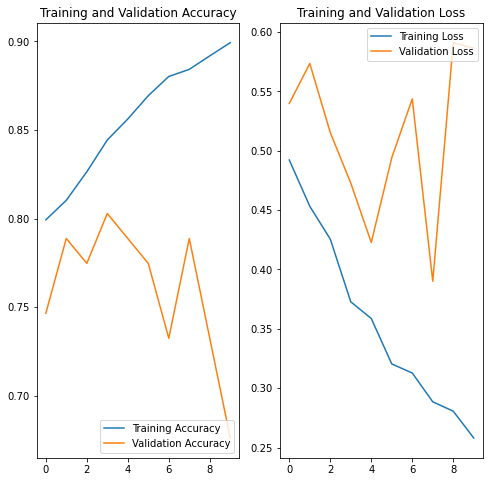

In [88]:

# Plot the training and validation accuracy/loss at each epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [85]:
# model evaluation
test_loss, test_acc = tb_model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

# model prediction
pred = tb_model.predict_generator(test_generator, steps=50)
pred = np.argmax(pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, pred))
print('Classification Report')
target_names = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

print(classification_report(test_generator.classes, pred, target_names=target_names))

c:\Users\ABHIJITH UDAYAKUMAR\.conda\envs\tensorflow\lib\site-packages\keras\engine\training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test acc: 0.5633803009986877


c:\Users\ABHIJITH UDAYAKUMAR\.conda\envs\tensorflow\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[ 7  0  0  6]
 [ 1  3  0  2]
 [ 1  1  0  2]
 [24  4  1 19]]
Classification Report
              precision    recall  f1-score   support

  EOSINOPHIL       0.21      0.54      0.30        13
  LYMPHOCYTE       0.38      0.50      0.43         6
    MONOCYTE       0.00      0.00      0.00         4
  NEUTROPHIL       0.66      0.40      0.49        48

    accuracy                           0.41        71
   macro avg       0.31      0.36      0.31        71
weighted avg       0.51      0.41      0.43        71



In [109]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Please install GPU version of TF
